## CB Model(title)

In [21]:
import pandas as pd 
import re
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [11]:
news_df=pd.read_csv('./Data/news.csv')
news_df.head()

,news_id,category,subcategory,title,abstract,url,title_entities,abstract_entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, and Prince Philip Swear By","Shop the notebooks, jackets, and more that the royals can't live without.",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"", ""Type"": ""P"", ""WikidataId"": ""Q80976"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [48], ""SurfaceForms"": [""Prince Philip""]}, {""Label"": ""Charles, Prince of Wales"", ""Type"": ""P"", ""WikidataId"": ""Q43274"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [28], ""SurfaceForms"": [""Prince Charles""]}, {""Label"": ""Elizabeth II"", ""Type"": ""P"", ""WikidataId"": ""Q9682"", ""Confidence"": 0.97, ""OccurrenceOffsets"": [11], ""SurfaceForms"": [""Queen Elizabeth""]}]",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding you back and keeping you from shedding that unwanted belly fat for good.,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""WikidataId"": ""Q193583"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [20], ""SurfaceForms"": [""Belly Fat""]}]","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""WikidataId"": ""Q193583"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [97], ""SurfaceForms"": [""belly fat""]}]"
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches of Ukraine's War,"Lt. Ivan Molchanets peeked over a parapet of sand bags at the front line of the war in Ukraine. Next to him was an empty helmet propped up to trick snipers, already perforated with multiple holes.",https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId"": ""Q212"", ""Confidence"": 0.946, ""OccurrenceOffsets"": [87], ""SurfaceForms"": [""Ukraine""]}]"
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My Mental Health.,"I felt like I was a fraud, and being an NBA wife didn't help that. In fact, it nearly destroyed me.",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ""Type"": ""O"", ""WikidataId"": ""Q155223"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [40], ""SurfaceForms"": [""NBA""]}]"
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a Dermatologist","They seem harmless, but there's a very good reason you shouldn't ignore them. The post How to Get Rid of Skin Tags, According to a Dermatologist appeared first on Reader's Digest.",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataId"": ""Q3179593"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [18], ""SurfaceForms"": [""Skin Tags""]}]","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataId"": ""Q3179593"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [105], ""SurfaceForms"": [""Skin Tags""]}, {""Label"": ""Dermatology"", ""Type"": ""C"", ""WikidataId"": ""Q171171"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [131], ""SurfaceForms"": [""Dermatologist""]}, {""Label"": ""Reader's Digest"", ""Type"": ""M"", ""WikidataId"": ""Q371820"", ""Confidence"": 0.999, ""OccurrenceOffsets"": [163], ""SurfaceForms"": [""Reader's Digest""]}]"


In [12]:
news_df['title'].sample(30)

7964                                                Tiger Dies, Sinkhole Woes, Coast Guard Cocaine Seizure: FL News
10639                                              'Avengers Damage Control' is the ideal VR follow-up to 'Endgame'
50510             Prescription for Debt: 'Sometimes I can't pay certain bills, because I have to pay for my drugs.'
25591                                                          Demolition delays for new MLS Stadium at Fairgrounds
36524                                             Michigan basketball 5-star target Nimari Burnett picks Texas Tech
6817                                                             Boil water order issued for Reading, officials say
26616                                                 Why Yankees' Aaron Hicks was bright spot in awful Game 3 loss
16765                                        I went to Peter Luger after it received zero stars from New York Times
5123                                                                    

## 텍스트 정제

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('puntk')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading puntk: Package 'puntk' not found in index
[nltk_data] Downloading package punkt_tab to /Users/mac/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

#### title 전처리

In [14]:
# 영어, 소문자로 통일, 불용어 제거, 숫자 제거(x), 특수문자 제거, 마지막에 내용이 줄임표시 되어있는 것들이 있음(...)

stop_words=set(stopwords.words('english'))  


def clean_text(text):
    text=text.lower()
    #text=re.sub(r'\d+','',text)
    text=re.sub(r'[^\w\s]','',text) # 특수문자 제거
    text=re.sub(r'\s+',' ',text) # 연속된 공백 하나의 공백으로
    tokens=word_tokenize(text)
    for token in tokens:
        if token in stop_words:
            tokens.remove(token)    
    text=' '.join(tokens)   
    
    return text
    

In [15]:
news_df['cleaned_title']=news_df['title'].apply(clean_text)
news_df[['cleaned_title','title']].head(10)

,cleaned_title,title
0,brands queen elizabeth prince charles prince philip swear,"The Brands Queen Elizabeth, Prince Charles, and Prince Philip Swear By"
1,50 worst habits belly fat,50 Worst Habits For Belly Fat
2,cost trumps aid freeze the trenches ukraines war,The Cost of Trump's Aid Freeze in the Trenches of Ukraine's War
3,was nba wife heres it affected mental health,I Was An NBA Wife. Here's How It Affected My Mental Health.
4,get rid skin tags according to a dermatologist,"How to Get Rid of Skin Tags, According to a Dermatologist"
5,nfl able fine players criticizing officiating,Should NFL be able to fine players for criticizing officiating?
6,been orlandos hottest october ever far cooler temperatures the way,"It's been Orlando's hottest October ever so far, but cooler temperatures on the way"
7,chile three die supermarket fire amid protests,Chile: Three die in supermarket fire amid protests
8,best ps5 games top playstation 5 titles look forward,Best PS5 games: top PlayStation 5 titles to look forward to
9,to report weatherrelated closings delays,"How to report weather-related closings, delays"


In [16]:
news_df.shape

(51282, 9)

## 벡터화 (단어 빈도 기준)

#### TF-IDF 벡터화 적용(baseline)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

#TF-IDF 
tfidf_vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=1000,  
    min_df=2,           
    max_df=0.8      
)

tfidf_matrix = tfidf_vectorizer.fit_transform(news_df["cleaned_title"])
tfidf_matrix.shape


(51282, 1000)

In [17]:
#(뉴스 개수,단어 개수)

In [19]:
# 적정 max_feature 구하기

In [ ]:

candidate_features = [500, 1000, 3000, 5000, 7000, 10000]

results = {}

for max_feat in candidate_features:

    tfidf_vectorizer = TfidfVectorizer(max_features=max_feat, stop_words="english", min_df=2, max_df=0.8)
    tfidf_matrix = tfidf_vectorizer.fit_transform(news_df["cleaned_title"])


    sim_matrix = cosine_similarity(tfidf_matrix)
    mean_similarity = np.mean(sim_matrix[np.triu_indices(sim_matrix.shape[0], k=1)])
    
    results[max_feat] = mean_similarity
    print(f"max_features={max_feat}: 평균 유사도 {mean_similarity:.4f}")


max_features=500: 평균 유사도 0.0063
max_features=1000: 평균 유사도 0.0050
max_features=3000: 평균 유사도 0.0034
max_features=5000: 평균 유사도 0.0029
max_features=7000: 평균 유사도 0.0026
max_features=10000: 평균 유사도 0.0024


In [ ]:
# 대략적으로 피쳐가 적을수록 유사도 높아짐 
# 피쳐 줄이는 방향으로 학습

In [20]:
tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
# 코사인 유사도 계산

tfidf_sim_matrix = cosine_similarity(tfidf_matrix)
tfidf_sim_matrix.shape



(51282, 51282)

In [19]:
tfidf_sim_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

#### 추천 뉴스 확인 함수

In [22]:
# 추천 뉴스 확인 함수

def get_tfidf_recommendations(news_id, news_df, sim_matrix, top_n=5):
    # 해당 뉴스 ID의 인덱스 찾기
    idx = news_df[news_df["news_id"] == news_id].index[0]

    # 해당 뉴스와 모든 뉴스 간 유사도 가져오기
    sim_scores = list(enumerate(sim_matrix[idx]))

    # 유사도가 높은 순으로 정렬
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 상위 N개 뉴스 ID 반환 (자기 자신 제외)
    top_news = [(news_df.iloc[i[0]]["news_id"], news_df.iloc[i[0]]["title"], i[1]) for i in sim_scores[1:top_n+1]]
    
    return top_news


#### 추천 뉴스 확인

In [ ]:
# 첫번째 뉴스의 추천 확인

news_id_example=news_df["news_id"].iloc[0]
tfidf_recommendations=get_tfidf_recommendations(news_id_example, news_df, tfidf_sim_matrix)


print(f"{news_id_example}의 유사한 뉴스 추천")
for rec in tfidf_recommendations:
    print(f"뉴스 ID: {rec[0]}, 제목: {rec[1]}, 유사도: {rec[2]:.4f}")


N55528의 유사한 뉴스 추천
뉴스 ID: N3917, 제목: Prince Edward Thrills the Internet with Hilarious Cake-Cutting Technique, 유사도: 0.8884
뉴스 ID: N38088, 제목: Prince William carves his own path as monarch in waiting, 유사도: 0.8884
뉴스 ID: N25838, 제목: Portis, Prince get technicals after Nets, Knicks scuffle, 유사도: 0.8884
뉴스 ID: N60671, 제목: Prince Charles Teared Up When Prince William Talked About Succeeding Him, 유사도: 0.8884
뉴스 ID: N9056, 제목: This Is What Queen Elizabeth Is Doing About the Prince William-Prince Harry Feud, 유사도: 0.7760


In [26]:
news_id_example = news_df["news_id"].iloc[0]


tfidf_recommendations = get_tfidf_recommendations(news_id_example, news_df, tfidf_sim_matrix)


original_news_title = news_df[news_df["news_id"] == news_id_example]["title"].values[0]
original_news_category = news_df[news_df["news_id"] == news_id_example]["category"].values[0]

print(f"[해당뉴스] {news_id_example} ({original_news_category})")
print(f"제목: {original_news_title}\n")

print(f"[TF-IDF 추천 뉴스 목록]")
for rec in tfidf_recommendations:
    rec_news_id = rec[0]
    rec_news_title = news_df[news_df["news_id"] == rec_news_id]["title"].values[0]
    rec_news_category = news_df[news_df["news_id"] == rec_news_id]["category"].values[0]
    
    print(f"뉴스 ID: {rec_news_id} ({rec_news_category})")
    print(f"   제목: {rec_news_title}")
    print(f"   유사도: {rec[2]:.4f}\n")


[해당뉴스] N55528 (lifestyle)
제목: The Brands Queen Elizabeth, Prince Charles, and Prince Philip Swear By

[TF-IDF 추천 뉴스 목록]
뉴스 ID: N3917 (lifestyle)
   제목: Prince Edward Thrills the Internet with Hilarious Cake-Cutting Technique
   유사도: 0.8884

뉴스 ID: N38088 (lifestyle)
   제목: Prince William carves his own path as monarch in waiting
   유사도: 0.8884

뉴스 ID: N25838 (sports)
   제목: Portis, Prince get technicals after Nets, Knicks scuffle
   유사도: 0.8884

뉴스 ID: N60671 (lifestyle)
   제목: Prince Charles Teared Up When Prince William Talked About Succeeding Him
   유사도: 0.8884

뉴스 ID: N9056 (lifestyle)
   제목: This Is What Queen Elizabeth Is Doing About the Prince William-Prince Harry Feud
   유사도: 0.7760



In [ ]:
# 같은 카테고리의 뉴스가 추천되며, 제목의 내용을 보면 키워드가 비슷한 뉴스가 추천되고 있는 것을 알 수 있음

#### 평균 유사도 

In [ ]:
# 상위 5개 평균	추천될 뉴스들만 평균 유사도를 구하여 실제 추천 품질 평가


def calculate_mean_similarity(news_df, sim_matrix):
    mean_similarities = []
    
    for i in range(sim_matrix.shape[0]):
        sorted_similarities = np.sort(sim_matrix[i])  # 유사도 정렬
        mean_similarities.append(np.mean(sorted_similarities[-6:-1]))  # 상위 5개 평균
        
    return np.mean(mean_similarities)


mean_sim_tfidf = calculate_mean_similarity(news_df, tfidf_sim_matrix)

print(f"TF-IDF Mean Similarity: {mean_sim_tfidf:.4f}")


TF-IDF Mean Similarity: 0.6732


- tfidf_vectorizer = TfidfVectorizer(
 stop_words="english",
 max_features=5000, # 중요 단어 수 제한
 min_df=2, 
 max_df=0.8
) -> TF-IDF Mean Similarity: 0.4646

- tfidf_vectorizer = TfidfVectorizer(
 stop_words="english",
 max_features=3000, # 중요 단어 수 제한
 min_df=2, 
 max_df=0.8
) -> TF-IDF Mean Similarity: 0.5206

- tfidf_vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=1000,   # 중요 단어 수 제한
    min_df=2, 
    max_df=0.8 ) -> TF-IDF Mean Similarity: 0.6732




### n-gram 적용

In [ ]:
# ngram 적용한 tf-idf (1~2), 3부터는 잘 안함

tfidf_vectorizer_ngram = TfidfVectorizer(
    stop_words="english",
    max_features=1000, 
    min_df=2,          
    max_df=0.8,    
    
    ngram_range=(1, 2) 
)


tfidf_matrix_ngram=tfidf_vectorizer_ngram.fit_transform(news_df["cleaned_title"])
tfidf_sim_matrix_ngram=cosine_similarity(tfidf_matrix_ngram)
tfidf_sim_matrix_ngram.shape


(51282, 51282)

In [19]:

news_id_example = news_df["news_id"].iloc[0]

tfidf_recommendations = get_tfidf_recommendations(news_id_example, news_df, tfidf_sim_matrix)
tfidf_recommendations_ngram = get_tfidf_recommendations(news_id_example, news_df, tfidf_sim_matrix_ngram)


print(f"기존 TF-IDF 추천 뉴스:")
for rec in tfidf_recommendations:
    print(f"뉴스 ID: {rec[0]}, 제목: {rec[1]}, 유사도: {rec[2]:.4f}")

print(f"\nN-gram TF-IDF 추천 뉴스:")
for rec in tfidf_recommendations_ngram:
    print(f"뉴스 ID: {rec[0]}, 제목: {rec[1]}, 유사도: {rec[2]:.4f}")


기존 TF-IDF 추천 뉴스:
뉴스 ID: N3917, 제목: Prince Edward Thrills the Internet with Hilarious Cake-Cutting Technique, 유사도: 0.8884
뉴스 ID: N38088, 제목: Prince William carves his own path as monarch in waiting, 유사도: 0.8884
뉴스 ID: N25838, 제목: Portis, Prince get technicals after Nets, Knicks scuffle, 유사도: 0.8884
뉴스 ID: N60671, 제목: Prince Charles Teared Up When Prince William Talked About Succeeding Him, 유사도: 0.8884
뉴스 ID: N9056, 제목: This Is What Queen Elizabeth Is Doing About the Prince William-Prince Harry Feud, 유사도: 0.7760

N-gram TF-IDF 추천 뉴스:
뉴스 ID: N3917, 제목: Prince Edward Thrills the Internet with Hilarious Cake-Cutting Technique, 유사도: 0.8884
뉴스 ID: N38088, 제목: Prince William carves his own path as monarch in waiting, 유사도: 0.8884
뉴스 ID: N25838, 제목: Portis, Prince get technicals after Nets, Knicks scuffle, 유사도: 0.8884
뉴스 ID: N60671, 제목: Prince Charles Teared Up When Prince William Talked About Succeeding Him, 유사도: 0.8884
뉴스 ID: N9056, 제목: This Is What Queen Elizabeth Is Doing About the Prince Wi

In [ ]:

# N-gram TF-IDF 평균 유사도

mean_sim_tfidf_ngram = calculate_mean_similarity(news_df, tfidf_sim_matrix_ngram)

print(f" TF-IDF Mean Similarity: {mean_sim_tfidf:.4f}")
print(f" N-gram TF-IDF Mean Similarity: {mean_sim_tfidf_ngram:.4f}")


 TF-IDF Mean Similarity: 0.6732
 N-gram TF-IDF Mean Similarity: 0.6812


### SVD 적용 

차원 축소 진행
- pca는 정사각행렬(공분산 행렬)에서 사용
- svd는 비정사각 행렬에서도 가능

In [32]:
from sklearn.decomposition import TruncatedSVD

#SVD 적용(100차원으로 축소)

n_components= 100
svd=TruncatedSVD(n_components=n_components, random_state=42)
tfidf_svd_matrix=svd.fit_transform(tfidf_matrix_ngram)


tfidf_svd_matrix.shape


(51282, 100)

In [33]:
# 유사도 행렬

tfidf_svd_sim_matrix=cosine_similarity(tfidf_svd_matrix)

tfidf_svd_sim_matrix.shape


(51282, 51282)

In [24]:
news_id_example = news_df["news_id"].iloc[0]

tfidf_svd_recommendations = get_tfidf_recommendations(news_id_example, news_df, tfidf_svd_sim_matrix)

print(f"\nSVD 적용 TF-IDF 추천 뉴스:")
for rec in tfidf_svd_recommendations:
    print(f"뉴스 ID: {rec[0]}, 제목: {rec[1]}, 유사도: {rec[2]:.4f}")



SVD 적용 TF-IDF 추천 뉴스:
뉴스 ID: N3917, 제목: Prince Edward Thrills the Internet with Hilarious Cake-Cutting Technique, 유사도: 0.9750
뉴스 ID: N38088, 제목: Prince William carves his own path as monarch in waiting, 유사도: 0.9750
뉴스 ID: N25838, 제목: Portis, Prince get technicals after Nets, Knicks scuffle, 유사도: 0.9750
뉴스 ID: N60671, 제목: Prince Charles Teared Up When Prince William Talked About Succeeding Him, 유사도: 0.9750
뉴스 ID: N9056, 제목: This Is What Queen Elizabeth Is Doing About the Prince William-Prince Harry Feud, 유사도: 0.9691


In [23]:

mean_sim_tfidf_svd=calculate_mean_similarity(news_df, tfidf_svd_sim_matrix)

print(f"SVD 적용 TF-IDF Mean Similarity: {mean_sim_tfidf_svd:.4f}")


SVD 적용 TF-IDF Mean Similarity: 0.8912


## 문맥을 고려한 임베딩 적용(W2V)

In [29]:
# title 이상치 처리 -> 길이가 너무 긴 데이터 처리

In [34]:
news_df['title_length']=news_df['title'].apply(len)
news_df.head(2)

,news_id,category,subcategory,title,abstract,url,title_entities,abstract_entities,cleaned_title,title_length
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, and Prince Philip Swear By","Shop the notebooks, jackets, and more that the royals can't live without.",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"", ""Type"": ""P"", ""WikidataId"": ""Q80976"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [48], ""SurfaceForms"": [""Prince Philip""]}, {""Label"": ""Charles, Prince of Wales"", ""Type"": ""P"", ""WikidataId"": ""Q43274"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [28], ""SurfaceForms"": [""Prince Charles""]}, {""Label"": ""Elizabeth II"", ""Type"": ""P"", ""WikidataId"": ""Q9682"", ""Confidence"": 0.97, ""OccurrenceOffsets"": [11], ""SurfaceForms"": [""Queen Elizabeth""]}]",[],brands queen elizabeth prince charles prince philip swear,70
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding you back and keeping you from shedding that unwanted belly fat for good.,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""WikidataId"": ""Q193583"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [20], ""SurfaceForms"": [""Belly Fat""]}]","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""WikidataId"": ""Q193583"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [97], ""SurfaceForms"": [""belly fat""]}]",50 worst habits belly fat,29


In [35]:
news_df['title_length'].describe()

count    51282.000000
mean        66.247241
std         19.216860
min         11.000000
25%         54.000000
50%         64.000000
75%         78.000000
max        333.000000
Name: title_length, dtype: float64

<Axes: xlabel='title_length'>

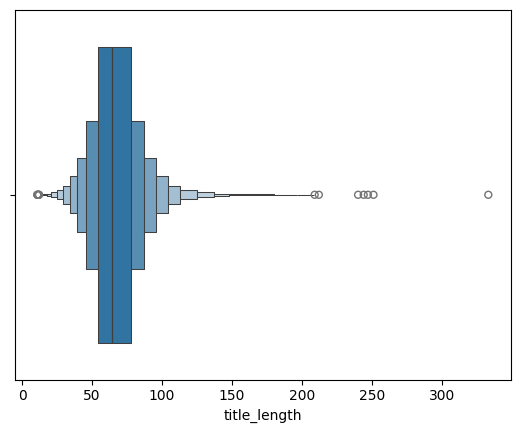

In [36]:
sns.boxenplot(news_df,x='title_length')

In [37]:
Q1=news_df["title_length"].quantile(0.25)
Q3=news_df["title_length"].quantile(0.75)
IQR =Q3-Q1
threshold=Q3+1.5*IQR

In [38]:
filter_df=news_df[news_df['title_length']<=threshold].copy()
filter_df.shape

(50554, 10)

In [39]:
news_df.shape

(51282, 10)

In [40]:
import gensim
from gensim.models import Word2Vec

#뉴스 제목을 단어 리스트로 변환(토큰화)
filter_df["tokenized_title"]=filter_df["cleaned_title"].apply(lambda x: x.split())


sentences=filter_df["tokenized_title"].tolist()

print(sentences[:5]) 


/Users/mac/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[['brands', 'queen', 'elizabeth', 'prince', 'charles', 'prince', 'philip', 'swear'], ['50', 'worst', 'habits', 'belly', 'fat'], ['cost', 'trumps', 'aid', 'freeze', 'the', 'trenches', 'ukraines', 'war'], ['was', 'nba', 'wife', 'heres', 'it', 'affected', 'mental', 'health'], ['get', 'rid', 'skin', 'tags', 'according', 'to', 'a', 'dermatologist']]


In [41]:
# 모델 학습 

word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

# 트럼프와 유사한 단어 화인해보기
print(word2vec_model.wv.most_similar("trump", topn=5)) 


[('ukraine', 0.9569083452224731), ('leans', 0.9547510147094727), ('trumps', 0.9538299441337585), ('donald', 0.9522023797035217), ('president', 0.9511992931365967)]


In [ ]:
# 트럼프와 관련된 단어 확인할 수 있음 
# president, committees..

In [43]:
# 개별 뉴스 제목을 벡터화하는 함수

def get_sentence_embedding(sentence, model, vector_size=100):
    words = [word for word in sentence if word in model.wv]
    if len(words) == 0:
        return np.zeros(vector_size)  
    return np.mean([model.wv[word] for word in words], axis=0)


filter_df["title_embedding"]=filter_df["tokenized_title"].apply(lambda x: get_sentence_embedding(x, word2vec_model))

print(filter_df["title_embedding"].head())


0         [-0.23657474, 0.289994, 0.113926485, -0.000497655, -0.10622226, -0.32517743, 0.102163166, 0.6092771, -0.20040755, -0.11702899, -0.11081044, -0.26449051, 0.0618638, 0.21474718, 0.3181627, -0.18693389, -0.06286489, -0.26044396, -0.015822059, -0.5110584, 0.16389604, 0.046752833, 0.18374248, -0.1902169, 0.03325677, -0.031151343, -0.1337922, -0.10707758, -0.3354445, -0.04004422, 0.19585627, -0.17747353, -0.10632928, -0.15360054, 0.053790793, 0.2581437, 0.007289561, -0.17395626, -0.027019316, -0.5727164, -0.2575048, -0.14076807, -0.15943901, 0.005220004, 0.27128187, -0.09435613, -0.20910701, 0.10386156, 0.114146225, 0.21024154, 0.016859375, -0.1867039, -0.16860363, -0.18911369, -0.18645063, 0.12656204, 0.19375089, 0.034416, -0.2034461, -0.17196256, -0.059134312, 0.0990994, -0.20750903, 0.06524464, -0.41716567, 0.30071083, 0.1109292, 0.25621992, -0.26569545, 0.20483471, -0.06841161, 0.24171025, 0.32443628, -0.11654877, 0.16447306, 0.21709594, 0.03340788, -0.054121066, -0.20628801, 0

In [44]:
# 평균 코사인 유사도 확인

title_embedding_matrix = np.vstack(filter_df["title_embedding"].values)

word2vec_sim_matrix = cosine_similarity(title_embedding_matrix)

print(f"Word2Vec 기반 평균 유사도: {np.mean(word2vec_sim_matrix):.4f}")


Word2Vec 기반 평균 유사도: 0.8842


## 카테고리 가중치 부여

In [ ]:

category_weights = {cat: 1.1 for cat in news_df["category"].unique()}  
default_weight = 0.9  


In [ ]:

def apply_diverse_category_weight(sim_matrix, news_df, category_weights, default_weight=0.9):
    weighted_sim_matrix = sim_matrix.copy()
    
    for i in range(len(news_df)):
        for j in range(len(news_df)):
            if i != j:  # 자기 자신과의 유사도는 그대로 유지
                cat_i = news_df.iloc[i]["category"]
                cat_j = news_df.iloc[j]["category"]

                # 같은 카테고리면 가중치 적용, 다른 카테고리에도 일부 가중치 부여
                weight = category_weights.get(cat_i, default_weight) if cat_i == cat_j else default_weight
                weighted_sim_matrix[i, j] *= weight

    return weighted_sim_matrix

In [ ]:
tfidf_svd_sim_diverse_matrix=apply_diverse_category_weight(tfidf_svd_sim_matrix, news_df, category_weights)
tfidf_svd_sim_diverse_matrix.shape

In [ ]:

#추천 뉴스 리스트에 랜덤 뉴스 추가 (Exploration)
def get_diverse_recommendations(news_id, news_df, sim_matrix, top_n=5, random_n=2):
    idx = news_df[news_df["news_id"] == news_id].index[0]  # 뉴스 인덱스 찾기
    
    sim_scores = list(enumerate(sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    top_news = [news_df.iloc[i[0]]["news_id"] for i in sim_scores[1:top_n+1]]  # 상위 N개
    random_news = news_df.sample(random_n)["news_id"].tolist()  # 랜덤 N개 추가
    
    return top_news + random_news

#  새로운 추천 결과 확인
news_id_example = news_df["news_id"].iloc[0]
diverse_recommendations = get_diverse_recommendations(news_id_example, news_df, tfidf_svd_sim_diverse_matrix)

print(f"'{news_id_example}' 뉴스와 유사한 추천 뉴스:")
for rec in diverse_recommendations:
    print(f"▶ 뉴스 ID: {rec}")


: 